Dataset size : 6000/60000


100%|██████████| 94/94 [00:01<00:00, 60.06it/s]


Test Loss: 0.0063, Accuracy: 87.90%


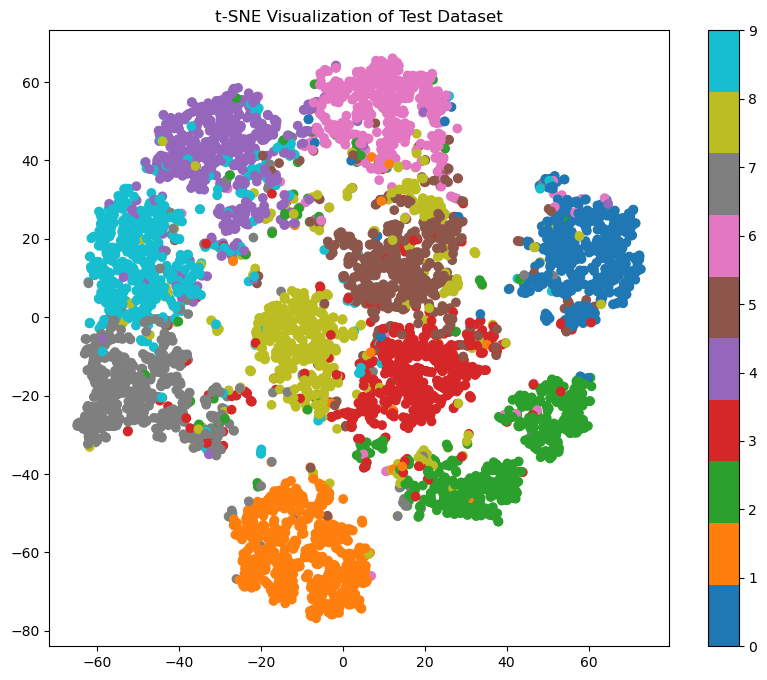

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torch
from torchvision import datasets, transforms
from sklearn.manifold import TSNE
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256) # 28*28 = 784
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def train(model, train_loader, optimizer, criterion):
    model.train()
    train_loss = 0
    correct = 0
    pbar = tqdm(total=len(train_loader))
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
        pbar.update(1)
    pbar.close()
    train_loss /= len(train_loader.dataset)
    accuracy = 100. * correct / len(train_loader.dataset)
    return train_loss, accuracy

def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, accuracy

batch_size = 64
learning_rate = 0.01
num_epochs = 10

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)


subf = 0.1
dataset_size = int(len(train_dataset) * subf)
print(f"Dataset size : {dataset_size}/{len(train_dataset)}")

train_dataset = torch.utils.data.Subset(train_dataset, range(dataset_size))
test_dataset = torch.utils.data.Subset(test_dataset, range(dataset_size))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

for epoch in range(num_epochs):
    train(model, train_loader, optimizer, criterion)

test_loss, accuracy = test(model, test_loader)
print(f"Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%")

tsne = TSNE(n_components=2, random_state=42)
test_features = []
test_labels = []
with torch.no_grad():
    for data, target in test_loader:
        data = data.to(device)
        features = model(data)
        test_features.extend(features.cpu().numpy())
        test_labels.extend(target.cpu().numpy())
test_features = torch.tensor(test_features)
test_labels = torch.tensor(test_labels)

tsne_results = tsne.fit_transform(test_features)

plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=test_labels, cmap='tab10')
plt.colorbar()
plt.title('t-SNE Visualization of Test Dataset')
plt.show()

Files already downloaded and verified
Files already downloaded and verified


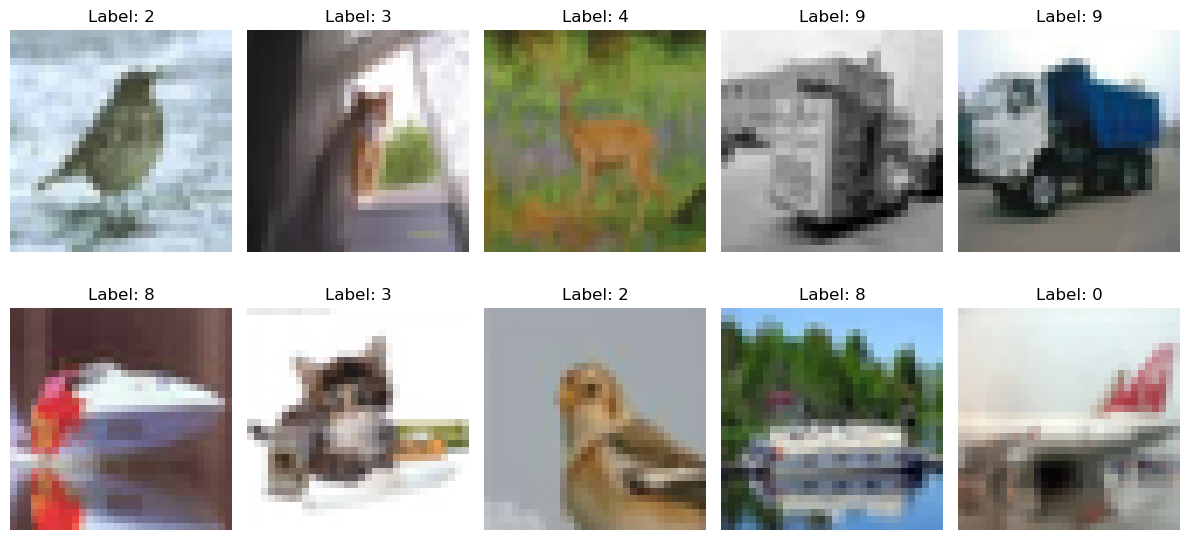

In [15]:
import torchvision
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


data_iter = iter(train_loader)
images, labels = next(data_iter)

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()
for i in range(min(len(images), len(axes))):
    image = images[i].numpy().transpose(1, 2, 0)
    label = labels[i].item()
    axes[i].imshow(image)
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # 배치를 제외한 모든 차원을 평탄화(flatten)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()